## Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_employee = pd.read_csv('employee.csv')
df_employee

,no,nama,tanggal_lahir,jenis_kelamin,gaji
0,1,ani,3/2/1993,perempuan,1000000
1,2,budi,3/1/1992,laki-laki,2000000
2,3,susi,4/5/2000,perempuan,1350000
3,4,wati,5/20/1995,perempuan,10000000
4,5,ati,4/23/1994,perempuan,3400000
5,6,ina,5/6/1991,perempuan,5000000
6,7,nia,4/5/1990,perempuan,2500000
7,8,dodi,4/3/1998,laki-laki,3400000
8,9,dedi,6/20/1993,laki-laki,8900000
9,10,roni,9/20/2001,laki-laki,2100000


## Explore Data

In [3]:
df_employee.dtypes

no                int64
nama             object
tanggal_lahir    object
jenis_kelamin    object
gaji              int64
dtype: object

In [4]:
df_employee.isnull().any()

no               False
nama             False
tanggal_lahir    False
jenis_kelamin    False
gaji             False
dtype: bool

## Preprocess Data

### Handling Datetime

In [5]:
df_employee['tanggal_lahir'] = pd.to_datetime(df_employee['tanggal_lahir'])
df_employee

,no,nama,tanggal_lahir,jenis_kelamin,gaji
0,1,ani,1993-03-02,perempuan,1000000
1,2,budi,1992-03-01,laki-laki,2000000
2,3,susi,2000-04-05,perempuan,1350000
3,4,wati,1995-05-20,perempuan,10000000
4,5,ati,1994-04-23,perempuan,3400000
5,6,ina,1991-05-06,perempuan,5000000
6,7,nia,1990-04-05,perempuan,2500000
7,8,dodi,1998-04-03,laki-laki,3400000
8,9,dedi,1993-06-20,laki-laki,8900000
9,10,roni,2001-09-20,laki-laki,2100000


### Handling Categorical Value (One Hot Encoder)

In [6]:
jk_dummies = pd.get_dummies(df_employee['jenis_kelamin'], prefix='jk')
jk_dummies

,jk_laki-laki,jk_perempuan
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,1,0
8,1,0
9,1,0


In [7]:
df_employee_jk = pd.concat([df_employee, jk_dummies], axis=1)
df_employee_jk

,no,nama,tanggal_lahir,jenis_kelamin,gaji,jk_laki-laki,jk_perempuan
0,1,ani,1993-03-02,perempuan,1000000,0,1
1,2,budi,1992-03-01,laki-laki,2000000,1,0
2,3,susi,2000-04-05,perempuan,1350000,0,1
3,4,wati,1995-05-20,perempuan,10000000,0,1
4,5,ati,1994-04-23,perempuan,3400000,0,1
5,6,ina,1991-05-06,perempuan,5000000,0,1
6,7,nia,1990-04-05,perempuan,2500000,0,1
7,8,dodi,1998-04-03,laki-laki,3400000,1,0
8,9,dedi,1993-06-20,laki-laki,8900000,1,0
9,10,roni,2001-09-20,laki-laki,2100000,1,0


In [8]:
del df_employee_jk['jenis_kelamin']
df_employee_jk

,no,nama,tanggal_lahir,gaji,jk_laki-laki,jk_perempuan
0,1,ani,1993-03-02,1000000,0,1
1,2,budi,1992-03-01,2000000,1,0
2,3,susi,2000-04-05,1350000,0,1
3,4,wati,1995-05-20,10000000,0,1
4,5,ati,1994-04-23,3400000,0,1
5,6,ina,1991-05-06,5000000,0,1
6,7,nia,1990-04-05,2500000,0,1
7,8,dodi,1998-04-03,3400000,1,0
8,9,dedi,1993-06-20,8900000,1,0
9,10,roni,2001-09-20,2100000,1,0


### Handling Categorical Value (Label Encoder)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
df_employee_jk['jk_label'] = le.fit_transform(df_employee['jenis_kelamin'])
df_employee_jk

,no,nama,tanggal_lahir,gaji,jk_laki-laki,jk_perempuan,jk_label
0,1,ani,1993-03-02,1000000,0,1,1
1,2,budi,1992-03-01,2000000,1,0,0
2,3,susi,2000-04-05,1350000,0,1,1
3,4,wati,1995-05-20,10000000,0,1,1
4,5,ati,1994-04-23,3400000,0,1,1
5,6,ina,1991-05-06,5000000,0,1,1
6,7,nia,1990-04-05,2500000,0,1,1
7,8,dodi,1998-04-03,3400000,1,0,0
8,9,dedi,1993-06-20,8900000,1,0,0
9,10,roni,2001-09-20,2100000,1,0,0


### Handling Numerical Values (Standard Scaler)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()

In [14]:
df_employee_jk['sc_gaji'] = sc.fit_transform(df_employee[['gaji']])
df_employee_jk

,no,nama,tanggal_lahir,gaji,jk_laki-laki,jk_perempuan,jk_label,sc_gaji
0,1,ani,1993-03-02,1000000,0,1,1,-1.001779
1,2,budi,1992-03-01,2000000,1,0,0,-0.663911
2,3,susi,2000-04-05,1350000,0,1,1,-0.883525
3,4,wati,1995-05-20,10000000,0,1,1,2.039035
4,5,ati,1994-04-23,3400000,0,1,1,-0.190896
5,6,ina,1991-05-06,5000000,0,1,1,0.349694
6,7,nia,1990-04-05,2500000,0,1,1,-0.494977
7,8,dodi,1998-04-03,3400000,1,0,0,-0.190896
8,9,dedi,1993-06-20,8900000,1,0,0,1.667380
9,10,roni,2001-09-20,2100000,1,0,0,-0.630124


C:\Users\Nugi G. Yasa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[]

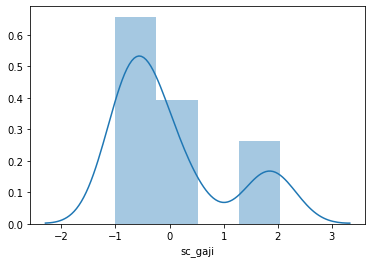

In [15]:
sns.distplot(df_employee_jk['sc_gaji'])
plt.plot()

### Handling Numerical Values (Min-Max Scaler)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
mms = MinMaxScaler()

In [20]:
df_employee_jk['mms_gaji'] = mms.fit_transform(df_employee[['gaji']])
df_employee_jk

,no,nama,tanggal_lahir,gaji,jk_laki-laki,jk_perempuan,jk_label,sc_gaji,mms_gaji
0,1,ani,1993-03-02,1000000,0,1,1,-1.001779,0.000000
1,2,budi,1992-03-01,2000000,1,0,0,-0.663911,0.111111
2,3,susi,2000-04-05,1350000,0,1,1,-0.883525,0.038889
3,4,wati,1995-05-20,10000000,0,1,1,2.039035,1.000000
4,5,ati,1994-04-23,3400000,0,1,1,-0.190896,0.266667
5,6,ina,1991-05-06,5000000,0,1,1,0.349694,0.444444
6,7,nia,1990-04-05,2500000,0,1,1,-0.494977,0.166667
7,8,dodi,1998-04-03,3400000,1,0,0,-0.190896,0.266667
8,9,dedi,1993-06-20,8900000,1,0,0,1.667380,0.877778
9,10,roni,2001-09-20,2100000,1,0,0,-0.630124,0.122222


C:\Users\Nugi G. Yasa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[]

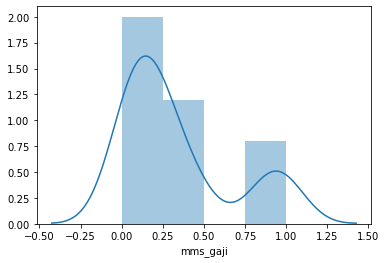

In [21]:
sns.distplot(df_employee_jk['mms_gaji'])
plt.plot()